<a href="https://colab.research.google.com/github/hanafimajid/tpot-mtr/blob/main/500s90f3t1g0_01py1_y1e2_y1e3(tpot2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tpot
from tpot import TPOTRegressor
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#importing data from a local CSV file
from google.colab import files
uploaded = files.upload()

Saving 500s90f3t1g0.01py1-y1e2-y1e3.csv to 500s90f3t1g0.01py1-y1e2-y1e3.csv


In [4]:
df = pd.read_csv("500s90f3t1g0.01py1-y1e2-y1e3.csv")
df.head()
y_col = [
    'Y1',
    'Y2',
    'Y3',
#    'Y4',
#    'Y5',
#    'Y6'
 ]
y = df[y_col]
y.head()
X = df[df.columns.drop(y)]
X.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90
0,0.260982,0.361552,0.308288,0.821089,0.729797,0.956128,0.718536,0.900234,0.375679,0.929292,...,0.499710,0.589580,0.777574,0.860301,0.142074,0.077579,0.193438,0.192470,0.634684,0.783955
1,0.671024,0.630614,0.999866,0.385708,0.466961,0.890496,0.374947,0.205671,0.283729,0.791689,...,0.693282,0.031124,0.022178,0.449209,0.318345,0.507809,0.010712,0.879496,0.235617,0.718189
2,0.913076,0.539609,0.866821,0.517430,0.842332,0.909407,0.442000,0.633823,0.281753,0.239146,...,0.954156,0.637119,0.782648,0.618949,0.944881,0.258287,0.484809,0.142084,0.221289,0.564499
3,0.999077,0.418707,0.850932,0.072710,0.953514,0.588483,0.748964,0.782350,0.075273,0.588127,...,0.809664,0.258609,0.686788,0.172356,0.265214,0.950426,0.630581,0.654531,0.887408,0.169782
4,0.718402,0.459845,0.371628,0.555262,0.499736,0.194074,0.302314,0.402101,0.174249,0.098715,...,0.962096,0.717123,0.052687,0.925817,0.316085,0.481621,0.419185,0.842954,0.214459,0.687978


In [5]:
y.head()

,Y1,Y2,Y3
0,0.431946,0.027655,0.551584
1,0.562802,0.007441,0.554489
2,0.356893,0.096821,0.537439
3,0.439865,0.022805,0.552224
4,0.459223,0.012916,0.553319


In [6]:
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split( 
                        X, y, test_size = 0.20, random_state = 39)
from sklearn.multioutput import MultiOutputRegressor
rfg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,criterion='squared_error'))

from sklearn.decomposition import PCA, KernelPCA
#pca = PCA(n_components=2)
#pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
pca = KernelPCA (kernel='rbf', fit_inverse_transform=True, random_state=39)
# transform and fit the feature of the training set
#X_train1 = pca.fit_transform(X_train)
# transform features of the test set
#X_test1 = pca.transform(X_test)

rfg.fit(X_train, y_train)
y_pred = rfg.predict(X_test)
rfg.score(X_test, y_test)

0.5199684437485661

In [7]:
import math
from sklearn.metrics import  mean_squared_error as morrfr_rmse
from sklearn.metrics import mean_absolute_error as morrfr_mae
morrfr_rmse1=math.sqrt(morrfr_rmse(y_test, y_pred))
print('RMSE for morrfr is',morrfr_rmse1)

morrfr_mae1=morrfr_mae(y_test, y_pred)
print('MAE for morrfr is',morrfr_mae1)

RMSE for morrfr is 0.09532505035868304
MAE for morrfr is 0.06457219141511399


In [8]:
#Running TPOT-MOR using MultiOutputRegressor from SK-Learn
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
tpotreg = MultiOutputRegressor(TPOTRegressor(warm_start=True ,generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10))
tpotreg.fit(X_train,y_train)
tpotreg.score(X_test, y_test)


import math
from sklearn.metrics import  mean_squared_error as tpotmo_mse
from sklearn.metrics import mean_absolute_error as tpotmo_mae
tpotmo_rmse1=math.sqrt(tpotmo_mse(y_test, y_pred))
print('RMSE for TPOT-MO is',tpotmo_rmse1)

tpotmo_mae1=tpotmo_mae(y_test, y_pred)
print('MAE for TPOT-MO is',tpotmo_mae1)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0011732421945276788

Generation 2 - Current best internal CV score: -0.0011732421945276788

Generation 3 - Current best internal CV score: -0.0011732421945276788

Generation 4 - Current best internal CV score: -0.0010989302062958338

Generation 5 - Current best internal CV score: -0.0010989302062958338

Best pipeline: ElasticNetCV(LinearSVR(input_matrix, C=5.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=1e-05), l1_ratio=0.8, tol=1e-05)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.01925230721815043

Generation 2 - Current best internal CV score: -0.01925230721815043

Generation 3 - Current best internal CV score: -0.01925230721815043

Generation 4 - Current best internal CV score: -0.01925230721815043

Generation 5 - Current best internal CV score: -0.01810585363561848

Best pipeline: ExtraTreesRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=15, n_estimators=100), bootstrap=True, max_features=0.9500000000000001, min_samples_leaf=9, min_samples_split=15, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0010548677955405802

Generation 2 - Current best internal CV score: -0.0010548677955405802

Generation 3 - Current best internal CV score: -0.0010548677955405802

Generation 4 - Current best internal CV score: -0.0010548677955405802

Generation 5 - Current best internal CV score: -0.0010548677955405802

Best pipeline: AdaBoostRegressor(StandardScaler(ElasticNetCV(input_matrix, l1_ratio=0.8500000000000001, tol=0.1)), learning_rate=1.0, loss=square, n_estimators=100)
RMSE for TPOT-MO is 0.09532505035868304
MAE for TPOT-MO is 0.06457219141511399


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


In [9]:
tpotreg.score(X_test, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ExtraTreesRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


0.7829509441616639

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
#pca = PCA(n_components=2)
#pca = KernelPCA(n_components = 2, kernel= "rbf")# extracts 2 features, specify the kernel as rbf
pca = KernelPCA (kernel='rbf', fit_inverse_transform=True, random_state=39)
# transform and fit the feature of the training set
#X_train2 = pca.fit_transform(X_train)
# transform features of the test set
#X_test2 = pca.transform(X_test)
from sklearn.svm import LinearSVR
from sklearn.multioutput import MultiOutputRegressor
#rfg1 = MultiOutputRegressor(LinearSVR(random_state=39,dual = True,max_iter=1000000))
rfg1 = MultiOutputRegressor(LinearSVR(tol=0.0001, C=1.0,loss='squared_epsilon_insensitive',intercept_scaling=1.0,fit_intercept=True,epsilon=0, random_state=39,dual = True,max_iter=1000000))
rfg1.fit(X_train, y_train)
y_pred1 = rfg1.predict(X_test)
rfg1.score(X_test, y_test)

0.39501470348844475

In [ ]:
import math
from sklearn.metrics import mean_absolute_error as morlsvr_mae2
from sklearn.metrics import mean_squared_error as morlsvr_rmse2
morlsvr_rmse1=math.sqrt(morlsvr_rmse2(y_test, y_pred1))
print('RMSE for morlsvr is',morlsvr_rmse1)
morlsvr_mae1=morlsvr_mae2(y_test, y_pred1)
print('MAE for morlsvr is',morlsvr_mae1)

RMSE for morlsvr is 0.10484189461869681
MAE for morlsvr is 0.0612649638226417


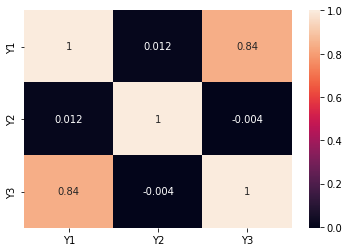

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:3]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

In [ ]:
class MultiOutputTP(object):
    def __init__(self, *args, **kwargs):
        self.args = args
        self.kwargs = kwargs
        
    def fit(self, X, y):
        X, y = map(np.atleast_2d, (X, y))
        assert X.shape[0] == y.shape[0]
        Ny = y.shape[1]
        
        self.clfs = []
        for i in range(Ny):
            #clf = GradientBoostingRegressor(**self.kwargs)
            #clf = LinearSVR(max_iter=10000000)
            #clf = LinearSVR(max_iter=500000, **self.kwargs)
            #clf = ExtraTreesRegressor(*self.args, **self.kwargs)
            #clf = RandomForestRegressor(*self.args)
            #clf = TPOTRegressor(*self.args, **self.kwargs)
            clf = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=39,n_jobs=1, max_time_mins=None, max_eval_time_mins=5,cv=10)
            Xi = np.hstack([X, y[:, :i]])
            yi = y[:, i]
            self.clfs.append(clf.fit(Xi, yi))
            
        return self
        
    def predict(self, X):
        y = np.empty([X.shape[0], len(self.clfs)])
        for i, clf in enumerate(self.clfs):
            y[:, i] = clf.predict(np.hstack([X, y[:, :i]]))
        return y

In [ ]:
pca = KernelPCA (kernel='rbf', fit_inverse_transform=True, random_state=39)
# transform and fit the feature of the training set
X_train3 = pca.fit_transform(X_train)
# transform features of the test set
X_test3 = pca.transform(X_test)

In [ ]:
import numpy as np
from tpot import decorators
decorators.MAX_EVAL_SECS = 240
clf2 = MultiOutputTP(50).fit(X_train3, y_train)
Ypred2 = clf2.predict(X_test3)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0015130960209311759

Generation 2 - Current best internal CV score: -0.0015130960209311759

Generation 3 - Current best internal CV score: -0.0015130960209311759

Generation 4 - Current best internal CV score: -0.0015130960209311759

Generation 5 - Current best internal CV score: -0.001103061633208792

Best pipeline: ElasticNetCV(LinearSVR(input_matrix, C=1.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=0.0001), l1_ratio=0.30000000000000004, tol=0.0001)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.0009012176535179255

Generation 2 - Current best internal CV score: -0.0008709016873578678

Generation 3 - Current best internal CV score: -0.0008709016873578678

Generation 4 - Current best internal CV score: -0.0008709016873578678

Generation 5 - Current best internal CV score: -0.0008709016873578678

Best pipeline: RandomForestRegressor(VarianceThreshold(input_matrix, threshold=0.001), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=4, min_samples_split=3, n_estimators=100)


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00028526894518015824

Generation 2 - Current best internal CV score: -0.00028526894518015824

Generation 3 - Current best internal CV score: -0.00028526894518015824

Generation 4 - Current best internal CV score: -0.00028526894518015824

Generation 5 - Current best internal CV score: -0.0001936555884405992

Best pipeline: AdaBoostRegressor(ZeroCount(VarianceThreshold(input_matrix, threshold=0.01)), learning_rate=1.0, loss=square, n_estimators=100)


In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 4), sharex=True, sharey=True)
    
ax[0].plot(Ypred2[:,4],Ypred2[:,5], 'o', alpha=0.7)
#ax[0].plot(Ypred2[:,2],'o', alpha=0.7)

ax[0].set_title("Daisy-chain method")


for axi in ax:
   # axi.add_patch(plt.Rectangle((0.6, 0.6), 1, 1, color='yellow', alpha=0.2))
    axi.set_xlim(0, 1)
    axi.set_ylim(0, 1)

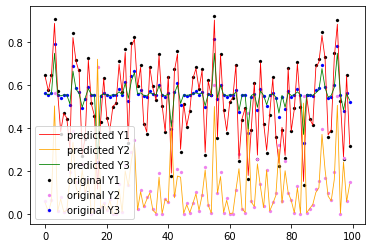

In [ ]:
X_ax = range(len(X_test))
#plt.scatter(y_test[:, 0],y_test[:, 1],y_test[:, 2], s=5, color="blue", label="original")
plt.scatter(X_ax, y_test.iloc[:,0], color="black", s=10,linewidth=0.1,label="original Y1")
plt.scatter(X_ax, y_test.iloc[:,1], color="violet", s=10,linewidth=0.1,label="original Y2")
plt.scatter(X_ax, y_test.iloc[:,2], color="blue", s=10,linewidth=0.1,label="original Y3")
#plt.scatter(X_ax, y_test.iloc[:,3], color="orange", s=10,linewidth=0.1,label="original Y4")
#plt.scatter(X_ax, y_test.iloc[:,4], color="gray", s=10,linewidth=0.1,label="original Y5")
#plt.scatter(X_ax, y_test.iloc[:,5], color="maroon", s=10,linewidth=0.1,label="original Y6")


plt.plot(X_ax, Ypred2[:,0], lw=0.8, color="red", label="predicted Y1")
plt.plot(X_ax, Ypred2[:,1], lw=0.8, color="orange", label="predicted Y2")
plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="green", label="predicted Y3")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="lime", label="predicted Y4")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="navy", label="predicted Y5")
#plt.plot(X_ax, Ypred2[:,2], lw=0.8, color="aqua", label="predicted Y6")
plt.legend()
plt.show()

In [ ]:
rmse = np.sqrt(((Ypred2 - y_test) ** 2).mean())
#rmse = sqrt(mean_squared_error(y_test, Ypred2))
#rmse
print("rmse: ",rmse)

from statistics import mean
arrmse = mean(rmse)
print("arrmse: ",arrmse)
from sklearn.metrics import mean_absolute_error as mae
mae = mae(y_test, Ypred2)
print("Mean absolute error : ",mae)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, Ypred2)
print("R2: ",r2)
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(y_test, Ypred2))
#RMSE2 = sqrt(mean_squared_error(Ytest, Ypred2))

print('RMSE for Ypred2 is',RMSE)
#print('RMSE for Ypred2 is',RMSE2)

rmse:  Y1    0.009290
Y2    0.021441
Y3    0.011779
dtype: float64
arrmse:  0.014170173480126766
Mean absolute error :  0.00926078789788236
R2:  0.9832003177305415
RMSE for Ypred2 is 0.015108344253701613


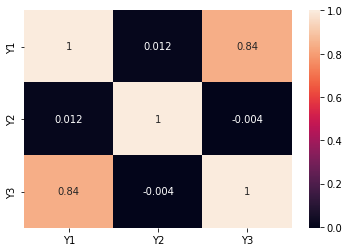

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = y_test.iloc[:,:3]
correlation_mat = df_small.corr(method='pearson')
sns.heatmap(correlation_mat, annot = True)
plt.show()